# Author : Pratik Y. Yawalkar
# GRIP (Data Science and Business Analytics)
Technical Task 2 : Prediction using Unsupervised Machine Learning(UML) [LEVEL: Beginner]


In this task, we are going to predict the optimum number of clusters from the given 'iris' dataset and represent it visually. This includes unsupervised learning.


# Step 1: To Import all the necessary Libraries used for Unsupervised ML

In [1]:
# Importing all the basic libraries required in the Prediction using the Unsupervised ML
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

# Step 2 : Creating a Dataframe using online dataset resource
 Click Here to <a href="https://bit.ly/3kXTdox">Download the dataset </a>

In [2]:
# Reading data from remote link
df = pd.read_csv('Iris.csv')

# Step 3 : Analysing the dataset 

In [3]:
print("***   Printing the first 10 rows of the dataset   *** ")
print()
print(df.head(10))

***   Printing the first 10 rows of the dataset   *** 

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


In [4]:
print("***   Printing the last 10 rows of the dataset   *** ")
print()
print(df.tail(10))

***   Printing the last 10 rows of the dataset   *** 

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
140  141            6.7           3.1            5.6           2.4   
141  142            6.9           3.1            5.1           2.3   
142  143            5.8           2.7            5.1           1.9   
143  144            6.8           3.2            5.9           2.3   
144  145            6.7           3.3            5.7           2.5   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
140  Iris-virginica  
141  Iris-virginica  
142  Iris-virginica  
143  Iris-virginica  
144  Iris-virginica  
145  Iris-virginica  
146  Iris-virginica 

In [5]:
print("***   Printing NaN Values for the dataset   *** ")
print()
print(df.isna().sum())

***   Printing NaN Values for the dataset   *** 

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


NaN standing for not a number, is a numeric data type used to represent any value that is undefined or unpresentable. For example, 0/0 is undefined as a real number and is, therefore, represented by NaN. So, in this dataset, we don't have such values.

In [6]:
print("***   Printing Statistical Description Values for the dataset   *** ")
print()
print(df.describe())

***   Printing Statistical Description Values for the dataset   *** 

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [7]:
print("***   Printing Unique Classes for the dataset   *** ")
print()
print(df.Species.nunique())

***   Printing Unique Classes for the dataset   *** 

3


In [8]:
print("***   Printing Unique Class Values for the dataset   *** ")
print()
print(df.Species.value_counts())

***   Printing Unique Class Values for the dataset   *** 

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


# Step 4 : Data Visualization

In [9]:
sns.set(style = 'whitegrid')
df_var = sns.load_dataset('iris');

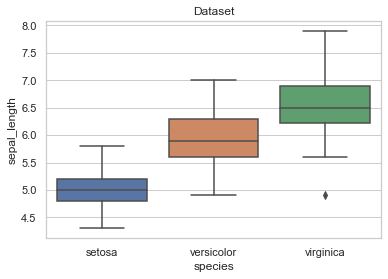

In [10]:
# Creating the boxplot for visualization (sepal_length)
sns.boxplot(x ='species',y = 'sepal_length',data = df_var);
plt.title('Dataset')
plt.show()

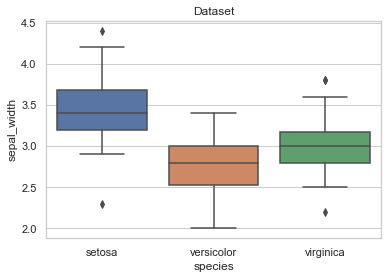

In [11]:
# Creating the boxplot for visualization (sepal_width)
sns.boxplot(x ='species',y ='sepal_width',data = df_var)
plt.title("Dataset")
plt.show()

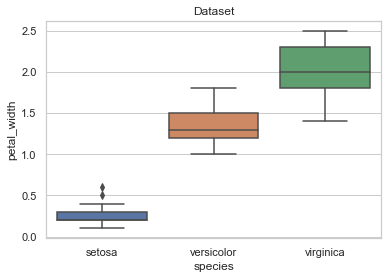

In [12]:
# Creating the boxplot for visualization (petal_length)
sns.boxplot(x ='species',y ='petal_width',data = df_var)
plt.title("Dataset")
plt.show()

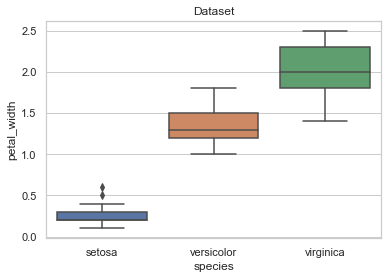

In [13]:
# Creating the boxplot for visualization (petal_width)
sns.boxplot(x ='species',y ='petal_width',data = df_var)
plt.title("Dataset")
plt.show()

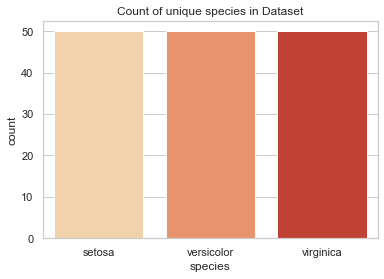

In [14]:
# Creating the countplot for visualization 
sns.countplot(x ='species', data = df_var, palette = "OrRd")
plt.title("Count of unique species in Dataset")
plt.show()

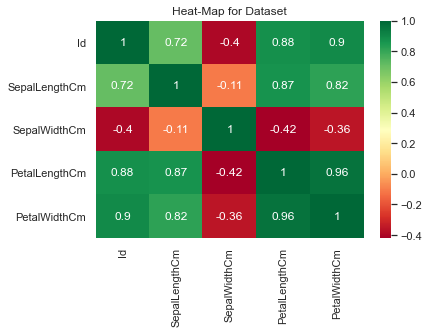

In [15]:
# Creating the Heat-Map Plot for visualization 
sns.heatmap(df.corr(), annot = True,cmap = 'RdYlGn')
plt.title("Heat-Map for Dataset")
plt.show()

# Step 5 : Finding the optimum number of clusters using k-means clustering Technique

In [16]:
# Finding the optimum number of clusters using k-means
opt_x = df.iloc[:,[0,1,2,3]].values

wcss_val_lst = []

for i in range(1,11):
    mean_k = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    mean_k.fit(opt_x)
    # Appending the WCSS Values to the list(wcss_val_lst)
    # kmeans.inertia_ returns the WCSS value for an initialized cluster
    wcss_val_lst.append(mean_k.inertia_) 
    print('For k=',i ,' , WCSS Value=',mean_k.inertia_)

For k= 1  , WCSS Value= 281831.54466666654
For k= 2  , WCSS Value= 70581.3808
For k= 3  , WCSS Value= 31320.711199999994
For k= 4  , WCSS Value= 17762.657226173542
For k= 5  , WCSS Value= 11423.238080088988
For k= 6  , WCSS Value= 7909.5306730769225
For k= 7  , WCSS Value= 5881.448116883118
For k= 8  , WCSS Value= 4562.780079365082
For k= 9  , WCSS Value= 3579.7205612745106
For k= 10  , WCSS Value= 2968.4914326653743


# Step 6: Visualizing the Graph
(based on WCSS Values)

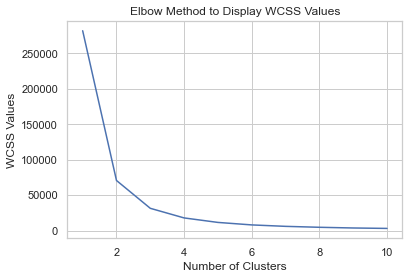

In [17]:
# Plotting the results onto a line graph, allowing us to observe 'The ELBOW' method
plt.plot(range(1,11),wcss_val_lst)
plt.title('Elbow Method to Display WCSS Values')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Values')
plt.show()

We can observe that after no. of cluster becomes 3, their is strip drop in WCSS Values. So we can choose value = '3' as the optimal number of clusters.

# Step 7 : Initializing K-Means With Optimum Number Of Clusters

In [18]:
# Fitting K-Means to the Dataset 
mean_k = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)

# Returns a label for each data point based on the number of clusters
y_mean_k = mean_k.fit_predict(opt_x)


# Step 8 : Visualizing the Clusters

In [19]:
# Predicting the values (in array representation)
y_mean_k

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

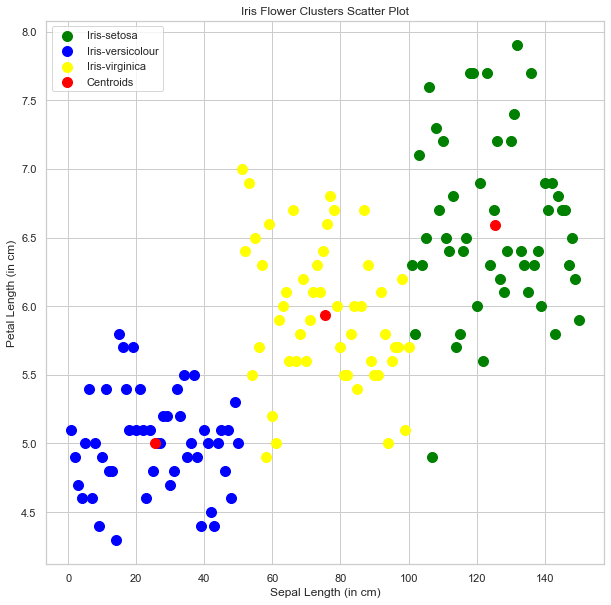

In [20]:
# Visualizing the clusters using scatter plots
plt.figure(figsize=(10,10))
plt.scatter(opt_x[y_mean_k==0,0],opt_x[y_mean_k==0,1],s=100,c='green',label='Iris-setosa')
plt.scatter(opt_x[y_mean_k==1,0],opt_x[y_mean_k==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(opt_x[y_mean_k==2,0],opt_x[y_mean_k==2,1],s=100,c='yellow',label='Iris-virginica')

# Plotting Centroids for the Clusters (for unique values)
plt.scatter(mean_k.cluster_centers_[:,0],mean_k.cluster_centers_[:,1],s=100,c='red',label='Centroids')
plt.title('Iris Flower Clusters Scatter Plot')
plt.xlabel('Sepal Length (in cm)')
plt.ylabel('Petal Length (in cm)')
plt.legend()
plt.show()